In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [ ]:
#HYPOTHESIS

#1) Misha
    #Do hybrid types have more happy effects compared to non-hybrid types?
        #Option 1: Create data frame from first 5 columns, then call columns needed to compare type with effect

    #Option 2: Group data by type and effect

    #Visual display of how many happy effects associated to each type - Donut Charts (3 total)
    
    #What is the correlation of type to effect-Use P-Values - Scatter Plot
        #Make sure to add statement - If P value is greater than x-value (look for this) there is a strong correlation

#2) Kim
    #Does sweet profile cannabis have a higher rating?
        #What Flavor had the Max Rating
        #What Flavor has the min Rating
        #What Flavor has the median Rating
    
#3) #Latti
    #Does the location of the breeder impact the rating? Does the location impact the type that is grown?


#4)  Tacha
    #Is there a significant difference in the effects experienced by consumers when they rate the same cannabis type differently? 
    #(Use data to get the ratings of the cannabis type and analyze the effects reported to see if they are consistent.) Do users feel different effects when they use the same type of cannabis(yes). How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.


In [2]:
Original_Data = pd.read_csv("MaryJane_clean_data.csv")
Original_Data.head()

,Strain,Type,Rating,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,effect 5,flavor 1,flavor 2,flavor 3,num_effects,num_flavors
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,5.0,3.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,5.0,3.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,5.0,3.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,5.0,3.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,5.0,3.0


In [3]:
Original_Data.Effects.str.split(",",expand=True)

,0,1,2,3,4
0,Creative,Energetic,Tingly,Euphoric,Relaxed
1,Relaxed,Aroused,Creative,Happy,Energetic
2,Uplifted,Happy,Relaxed,Energetic,Creative
3,Tingly,Creative,Hungry,Relaxed,Uplifted
4,Happy,Relaxed,Euphoric,Uplifted,Talkative
...,...,...,...,...,...
2048,Happy,Uplifted,Relaxed,Euphoric,Energetic
2049,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2050,Relaxed,Sleepy,Talkative,Euphoric,Happy
2051,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [4]:
effects = Original_Data.Effects.str.split(",",expand=True)
effects.columns=["effect_1", "effect_2", "effect_3", "effect_4", "effect_5"]
effects.head()

,effect_1,effect_2,effect_3,effect_4,effect_5
0,Creative,Energetic,Tingly,Euphoric,Relaxed
1,Relaxed,Aroused,Creative,Happy,Energetic
2,Uplifted,Happy,Relaxed,Energetic,Creative
3,Tingly,Creative,Hungry,Relaxed,Uplifted
4,Happy,Relaxed,Euphoric,Uplifted,Talkative


In [5]:
flavors = Original_Data.Flavor.str.split(",",expand=True)
flavors.columns=["flavor_1", "flavor_2", "flavor_3", "flavor_4"]
flavors.head()

,flavor_1,flavor_2,flavor_3,flavor_4
0,Earthy,Sweet,Citrus,None
1,Flowery,Violet,Diesel,None
2,Spicy/Herbal,Sage,Woody,None
3,Apricot,Citrus,Grapefruit,None
4,Citrus,Earthy,Orange,None


In [6]:
flavors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flavor_1  2053 non-null   object
 1   flavor_2  2053 non-null   object
 2   flavor_3  2053 non-null   object
 3   flavor_4  39 non-null     object
dtypes: object(4)
memory usage: 64.3+ KB


In [7]:
pd.concat([Original_Data, effects, flavors], axis=1)

,Strain,Type,Rating,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,...,num_flavors,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,...,3.0,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,...,3.0,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,...,3.0,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,...,3.0,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,...,3.0,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",Zeus OG is a hybrid cross between Pineapple OG...,Happy,Uplifted,Relaxed,Euphoric,...,3.0,Happy,Uplifted,Relaxed,Euphoric,Energetic,Earthy,Woody,Pine,None
2049,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",Zkittlez is an indica-dominant mix of Grape Ap...,Relaxed,Happy,Euphoric,Uplifted,...,3.0,Relaxed,Happy,Euphoric,Uplifted,Sleepy,Sweet,Berry,Grape,None
2050,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Zombie Kush by Ripper Seeds comes from two dif...,Relaxed,Sleepy,Talkative,Euphoric,...,3.0,Relaxed,Sleepy,Talkative,Euphoric,Happy,Earthy,Sweet,Spicy/Herbal,None
2051,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",If you’re looking to transform into a flesh-ea...,Relaxed,Sleepy,Euphoric,Happy,...,3.0,Relaxed,Sleepy,Euphoric,Happy,Hungry,Sweet,Earthy,Pungent,None


In [8]:
#Clean original data and combined data frame of the flavors and effects into the original Data Frame
OD2=pd.concat([Original_Data, effects, flavors], axis=1)
OD2.head()

,Strain,Type,Rating,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,...,num_flavors,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,...,3.0,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,...,3.0,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,None
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,...,3.0,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,...,3.0,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,...,3.0,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None


In [9]:
OD2["num_effects"]=OD2.Effects.str.count(",")+1
OD2["num_flavors"]=OD2.Flavor.str.count(",")+1
OD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2053 non-null   object 
 1   Type         2053 non-null   object 
 2   Rating       2053 non-null   float64
 3   Effects      2053 non-null   object 
 4   Flavor       2053 non-null   object 
 5   Description  2053 non-null   object 
 6   effect 1     2053 non-null   object 
 7   effect 2     2053 non-null   object 
 8   effect 3     2053 non-null   object 
 9   effect 4     2053 non-null   object 
 10  effect 5     2053 non-null   object 
 11  flavor 1     2053 non-null   object 
 12  flavor 2     2053 non-null   object 
 13  flavor 3     2053 non-null   object 
 14  num_effects  2053 non-null   int64  
 15  num_flavors  2053 non-null   int64  
 16  effect_1     2053 non-null   object 
 17  effect_2     2053 non-null   object 
 18  effect_3     2053 non-null   object 
 19  effect

In [10]:
OD2["effect_1"].value_counts()

effect_1
Relaxed      800
Happy        449
Euphoric     227
Uplifted     215
Creative      65
Energetic     64
Sleepy        62
Focused       44
Talkative     41
Aroused       29
Hungry        28
Tingly        22
Giggly         7
Name: count, dtype: int64

In [11]:
#Remove null values - Flavor4
OD2=OD2.drop(columns=["flavor_4"])
OD3=OD2.dropna(how="any")
OD3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053 entries, 0 to 2052
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2053 non-null   object 
 1   Type         2053 non-null   object 
 2   Rating       2053 non-null   float64
 3   Effects      2053 non-null   object 
 4   Flavor       2053 non-null   object 
 5   Description  2053 non-null   object 
 6   effect 1     2053 non-null   object 
 7   effect 2     2053 non-null   object 
 8   effect 3     2053 non-null   object 
 9   effect 4     2053 non-null   object 
 10  effect 5     2053 non-null   object 
 11  flavor 1     2053 non-null   object 
 12  flavor 2     2053 non-null   object 
 13  flavor 3     2053 non-null   object 
 14  num_effects  2053 non-null   int64  
 15  num_flavors  2053 non-null   int64  
 16  effect_1     2053 non-null   object 
 17  effect_2     2053 non-null   object 
 18  effect_3     2053 non-null   object 
 19  effect

In [12]:
OD3.head()

,Strain,Type,Rating,Effects,Flavor,Description,effect 1,effect 2,effect 3,effect 4,...,num_effects,num_flavors,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,...,5,3,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,...,5,3,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,...,5,3,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,...,5,3,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,...,5,3,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange


In [13]:
#We droped 12% of null values so 88% of our data is valid
#(2351-2053)/2351

In [14]:
#fIND TOTAL VALUES FOR EACH TYPE
OD3.Type.value_counts()

Type
hybrid    1045
indica     621
sativa     387
Name: count, dtype: int64

In [15]:
#Find average rating for each
OD3.groupby("Type").Rating.mean()

Type
hybrid    4.440096
indica    4.447987
sativa    4.433333
Name: Rating, dtype: float64

In [16]:
#COUNT FOR EACH EFFECT FOR EFFECT1 BY TYPE
#OD3.groupby(["Type", "effect_1"]).size()

In [29]:
#COUNT FOR EACH EFFECT FOR EFFECT1 BY TYPE
OD3.groupby(["Type", "effect_1"]).size()
df4=OD3.groupby(["Type", "effect_1"]).size()
df5=pd.DataFrame(df4)
df5

0
Type   effect_1      
hybrid Aroused     13
       Creative    36
       Energetic   25
       Euphoric   125
       Focused     26
       Giggly       3
       Happy      286
       Hungry      15
       Relaxed    346
       Sleepy      22
       Talkative   29
       Tingly      12
       Uplifted   107
indica Aroused     11
       Creative     7
       Energetic    2
       Euphoric    53
       Focused      4
       Giggly       3
       Happy       51
       Hungry      10
       Relaxed    420
       Sleepy      36
       Talkative    2
       Tingly       6
       Uplifted    16
sativa Aroused      5
       Creative    22
       Energetic   37
       Euphoric    49
       Focused     14
       Giggly       1
       Happy      112
       Hungry       3
       Relaxed     34
       Sleepy       4
       Talkative   10
       Tingly       4
       Uplifted    92

In [18]:
#Create New Data Frame with Type and Effects
t_e1=OD3.groupby(["Type", "effect_1"]).size()

h11_df=pd.DataFrame(t_e1)
h11_df.head

<bound method NDFrame.head of                     0
Type   effect_1      
hybrid Aroused     13
       Creative    36
       Energetic   25
       Euphoric   125
       Focused     26
       Giggly       3
       Happy      286
       Hungry      15
       Relaxed    346
       Sleepy      22
       Talkative   29
       Tingly      12
       Uplifted   107
indica Aroused     11
       Creative     7
       Energetic    2
       Euphoric    53
       Focused      4
       Giggly       3
       Happy       51
       Hungry      10
       Relaxed    420
       Sleepy      36
       Talkative    2
       Tingly       6
       Uplifted    16
sativa Aroused      5
       Creative    22
       Energetic   37
       Euphoric    49
       Focused     14
       Giggly       1
       Happy      112
       Hungry       3
       Relaxed     34
       Sleepy       4
       Talkative   10
       Tingly       4
       Uplifted    92>

In [19]:
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)

In [20]:
#HYBRID DATA FRAME
hybrid_e1=h11_df.loc["hybrid"]
hybrid_e1

,0
effect_1,
Aroused,13
Creative,36
Energetic,25
Euphoric,125
Focused,26
Giggly,3
Happy,286
Hungry,15
Relaxed,346


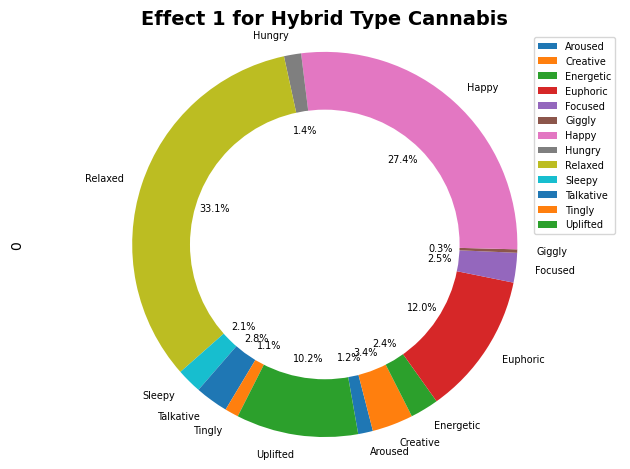

In [21]:
#HYBRID
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
hybrid_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=7)

plt.title("Effect 1 for Hybrid Type Cannabis",fontweight="bold",fontsize=14)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='upper right',fontsize=7)

# draw circle
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [22]:
#INDICA DATA FRAME
indica_e1=h11_df.loc["indica"]
indica_e1

,0
effect_1,
Aroused,11
Creative,7
Energetic,2
Euphoric,53
Focused,4
Giggly,3
Happy,51
Hungry,10
Relaxed,420


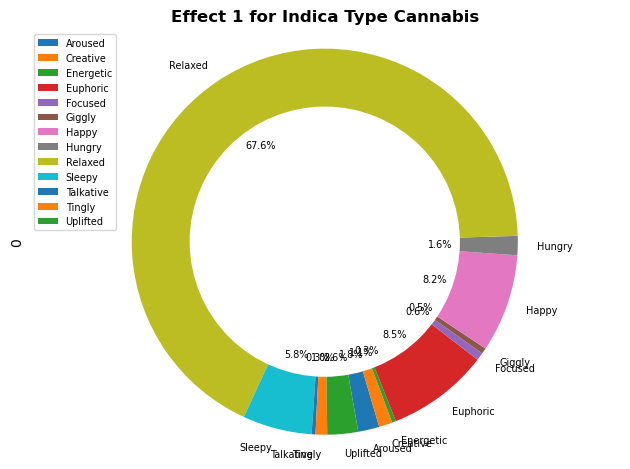

In [26]:
#INDICA
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
indica_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=7)

plt.title("Effect 1 for Indica Type Cannabis",fontweight="bold",fontsize=12)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='upper left',fontsize=7)


# draw circle
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [27]:
#SATIVA DATA FRAME
sativa_e1=h11_df.loc["sativa"]
sativa_e1

,0
effect_1,
Aroused,5
Creative,22
Energetic,37
Euphoric,49
Focused,14
Giggly,1
Happy,112
Hungry,3
Relaxed,34


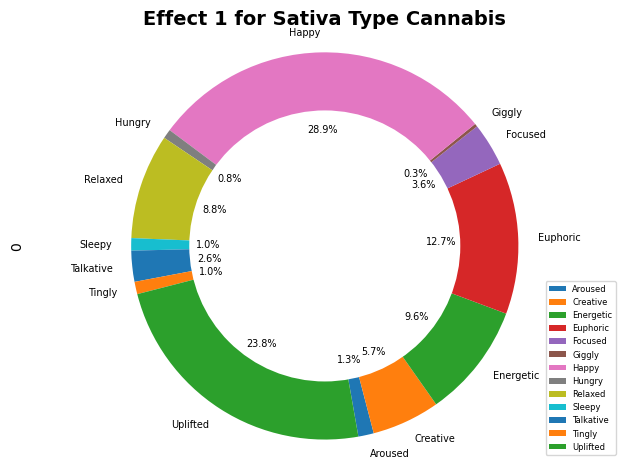

In [28]:
#SATIVA
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
sativa_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=7)

plt.title("Effect 1 for Sativa Type Cannabis",fontweight="bold",fontsize=14)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='lower right',fontsize=6)

# draw circle
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [ ]:
#COUNT FOR EACH EFFECT FOR EFFECT2 BY TYPE
#OD3.groupby(["Type", "effect_2"]).size()

In [ ]:
#COUNT FOR EACH EFFECT FOR EFFECT3 BY TYPE
#OD3.groupby(["Type", "effect_3"]).size()

In [ ]:
#COUNT FOR EACH EFFECT FOR EFFECT1 BY TYPE
#OD3.groupby(["Type", "effect_4"]).size()

In [ ]:
#COUNT FOR EACH EFFECT FOR EFFECT4 BY TYPE
#OD3.groupby(["Type", "effect_5"]).size()

In [ ]:
 #What is the correlation of type to effect-Use P-Values - Scatter Plot
        #Make sure to add statement - If P value is greater than x-value (look for this) there is a strong correlation

In [17]:
#df3.to_csv("MaryJane_clean_data.csv", index=False)